Loan Application Status Prediction
Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Extracting dataset and saving dataset in a variable

data = pd.read_csv('loan_prediction.csv')

In [5]:
#Displaying the dataset

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Checking our dataset total no.of rows and columns

data.shape

(614, 13)

Dataset contains 613 rows and 13 columns

### Statistical Summary

In [7]:
#Check if any null values present

data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

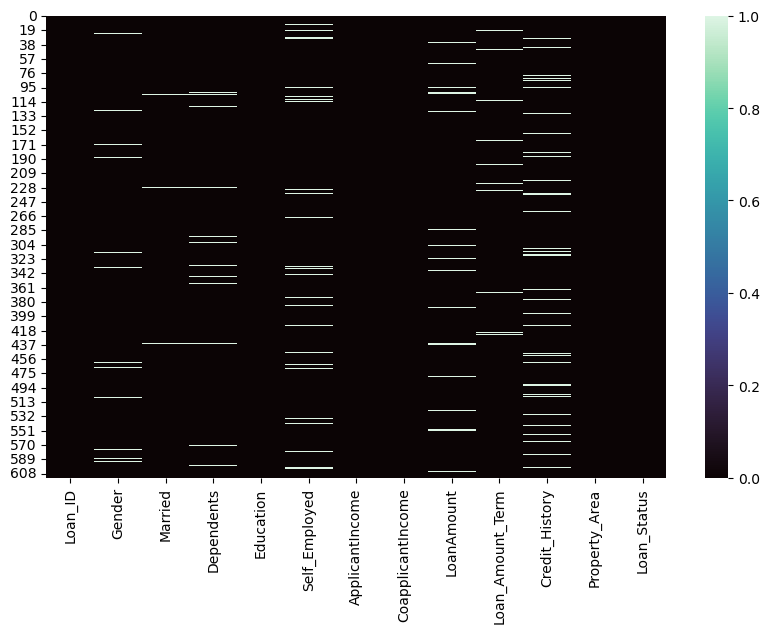

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='mako')
plt.show()


In [9]:
#store the column names in a list that has null values

columns_with_nan = ["Gender", "Married", "Dependents","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History"]

In [10]:
#replace NaN values with modes independently

for col in columns_with_nan:
    data[col].fillna(data[col].mode()[0], inplace=True)

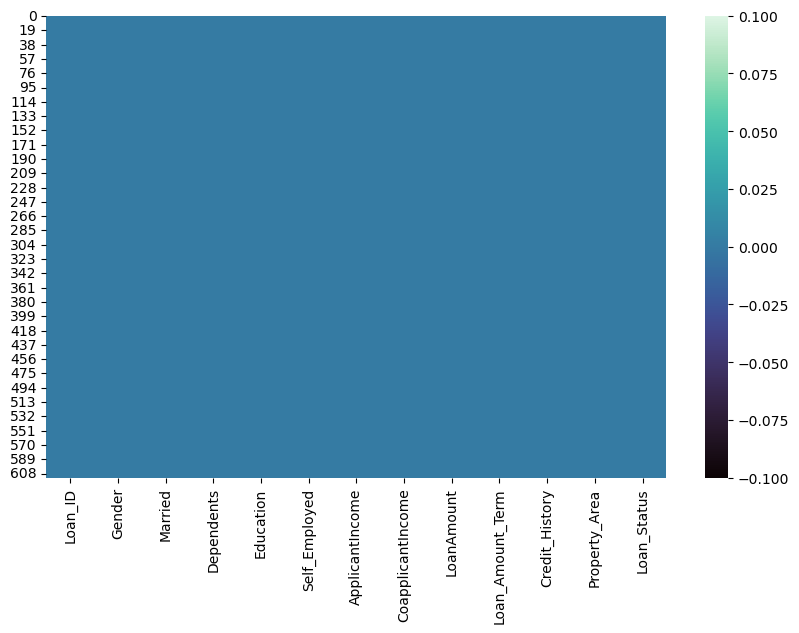

In [11]:
#Plot null values to check if any available

plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='mako')
plt.show()

now we have  no null values

In [12]:
#To check the statistical value of each column

data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Columns: "ApplicantIncome", "CoapplicantIncome" has more standard deviation than the mean and "LoanAmount" has also some outliers

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We have the following categorical data columns:

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status

### Explratory Data Analysis (EDA)

#### Univariate Analysis

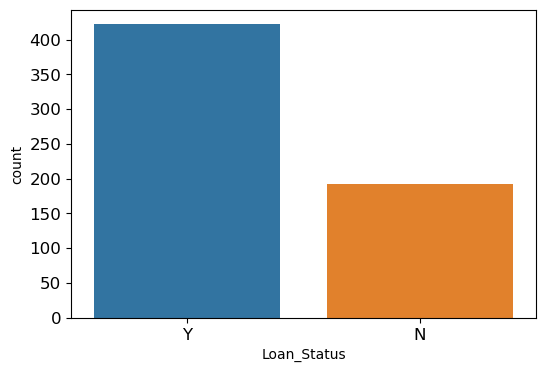

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
#Target Column "Loan_Status"

plt.figure(figsize = (6,4),facecolor='White')
sns.countplot(x='Loan_Status', data = data)
plt.tick_params(labelsize=12)
plt.show()


data['Loan_Status'].value_counts()

Observation:
- In our Dataset more than half of the loan applications are approved 
- There 2:1 chance of the loans getting approved and rejected


 Our label column is Imbanced and we would need to balance it by using "Under sampling/Over Sampling method"

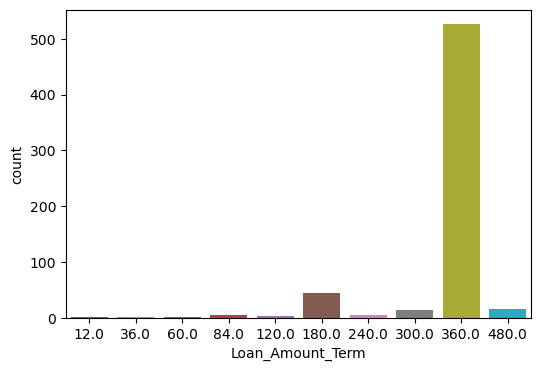

In [15]:
plt.figure(figsize = (6,4),facecolor='White')
sns.countplot(x='Loan_Amount_Term', data = data)
plt.tick_params(labelsize=10)
plt.show()


Observation:
- "Loan_Amount_Term : 360.0" has the highest loans approved

#### Bivariate Analysis

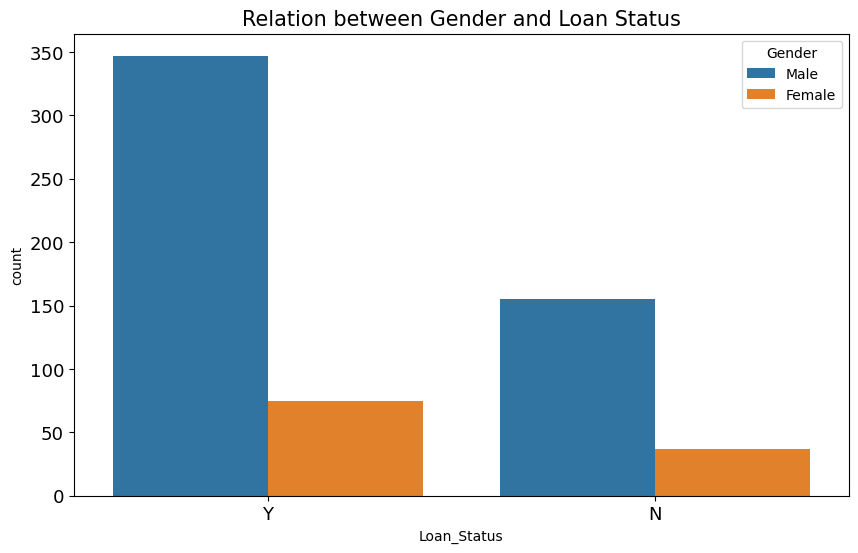

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check Relation between Gender and Loan Status
plt.figure(figsize=(10, 6), facecolor='White')
sns.countplot(data=data, x='Loan_Status', hue='Gender')
plt.title('Relation between Gender and Loan Status', fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

Observation:
- Male Candidates have higher chance of getting the loan approval and rejection when compared to female candidates

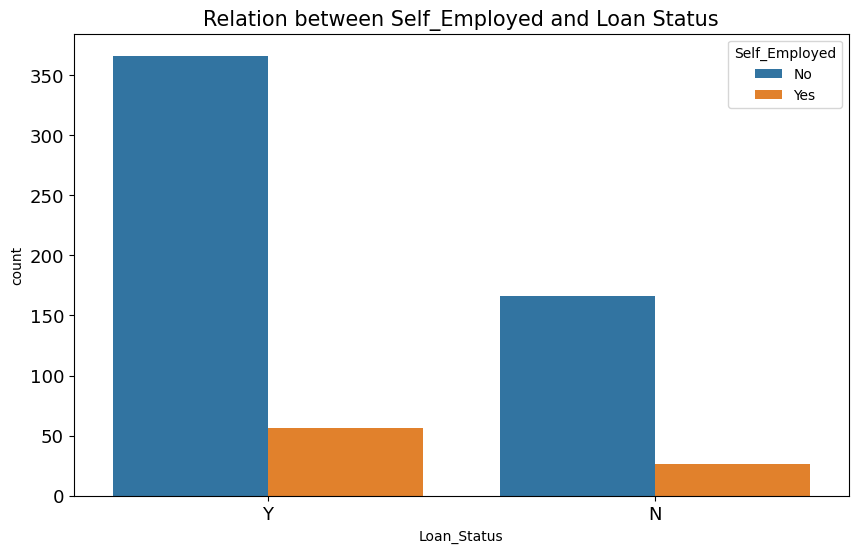

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check Relation between Self_Employed and Loan Status
plt.figure(figsize=(10, 6), facecolor='White')
sns.countplot(data=data, x='Loan_Status', hue='Self_Employed')
plt.title('Relation between Self_Employed and Loan Status', fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

Observation:
- We see that there are still high chances that a non self employed candidate also gets their loan applications approved

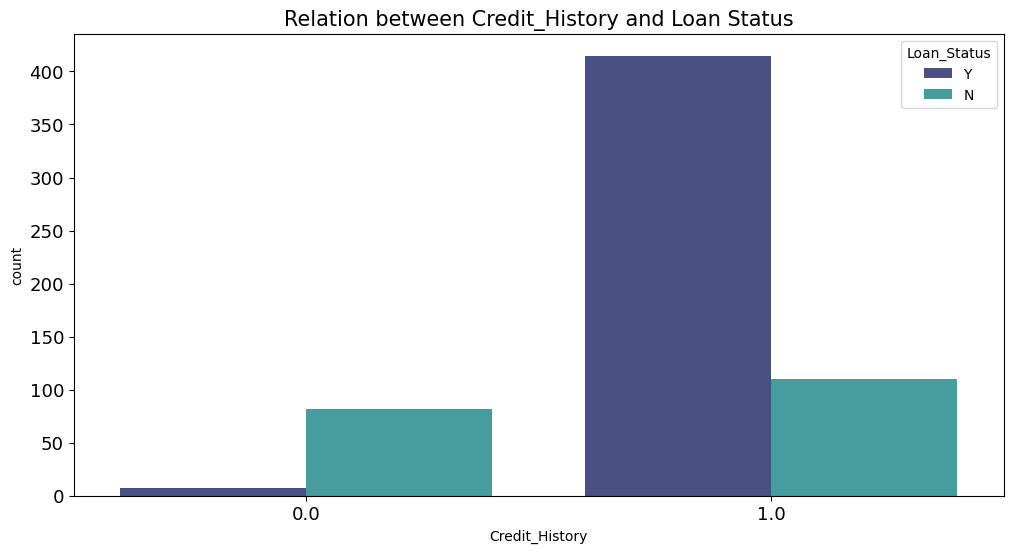

In [18]:
# Check Relation between Credit_History and Loan Status

plt.figure(figsize=(12, 6), facecolor='White')
sns.countplot(data=data, x='Credit_History', hue='Loan_Status', palette="mako")
plt.title('Relation between Credit_History and Loan Status', fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

Observation:
- Loan Applications are still approved for the candidates who have previous Credit History

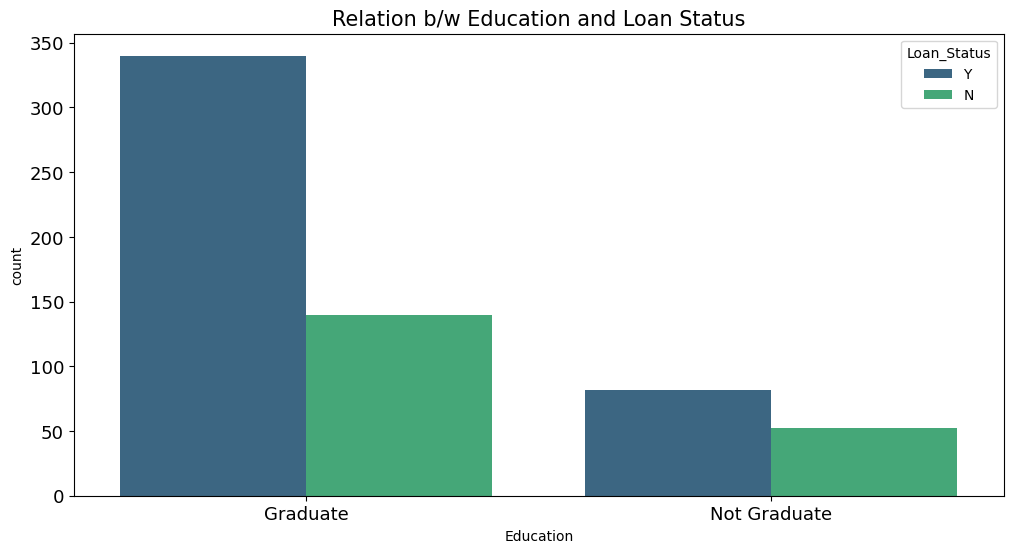

In [19]:
#Checking the relation b/w Education and Loan Status

plt.figure(figsize = (12,6),facecolor='White')
sns.countplot(x='Education',data = data,hue="Loan_Status",palette="viridis")
plt.title('Relation b/w Education and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

Observation:
- High Chances of Loan Applications approval of the Graduated candidates when compared to Not Graduated candidates

Hence, the Graduated populates gets the more loans facility

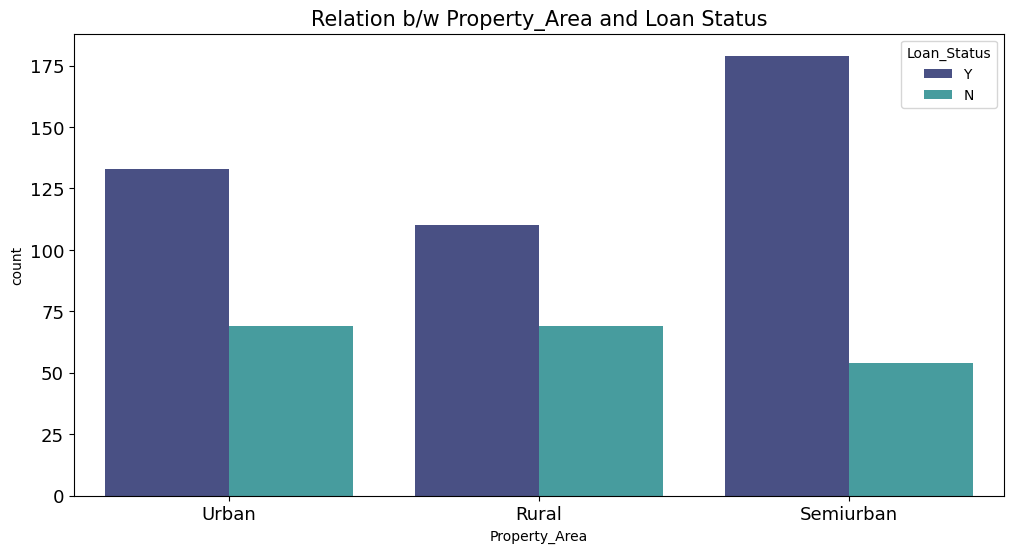

In [20]:
#Checking the relation b/w Property_Area and Loan Status

plt.figure(figsize = (12,6),facecolor='White')
sns.countplot(x='Property_Area',data = data,hue="Loan_Status",palette="mako")
plt.title('Relation b/w Property_Area and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

Observation:
    - Semiurban area property candidates have high chances of loan approval and Urban property candidates also gets more number of loans approved
    - Rural Area candidates have high chances of Loans rejected and less chances of loans approvals when compared to the Semiurban and Urban area property candidates

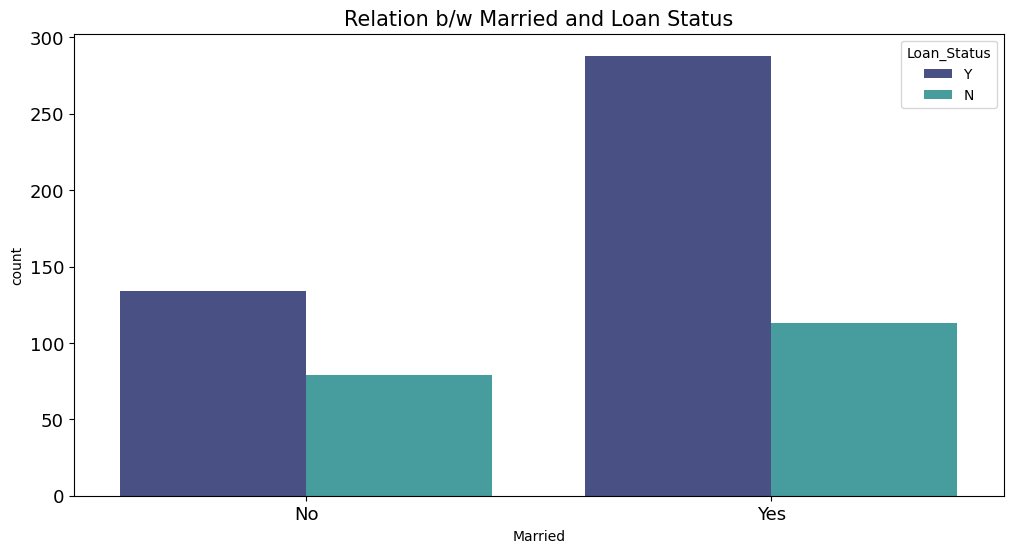

In [21]:
#Checking the relation b/w Married and Loan Status

plt.figure(figsize = (12,6),facecolor='White')
sns.countplot(x='Married',data = data,hue="Loan_Status",palette="mako")
plt.title('Relation b/w Married and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

Observation:
- Married Candidate's Loan Applications are largely approved when compared to unmarried candidates

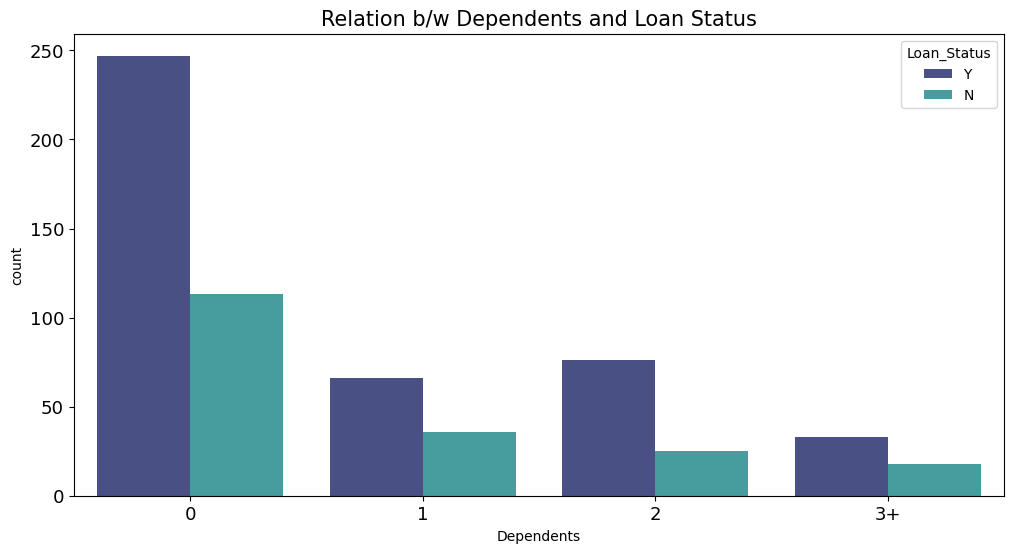

In [22]:
#Checking the relation b/w Dependents and Loan Status

plt.figure(figsize = (12,6),facecolor='White')
sns.countplot(x='Dependents',data = data,hue="Loan_Status",palette="mako")
plt.title('Relation b/w Dependents and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

Observation:
- Candidates with no dependents, high chances of loan approvals
- Candidates with more than 3 dependents, least chances of loan approvals

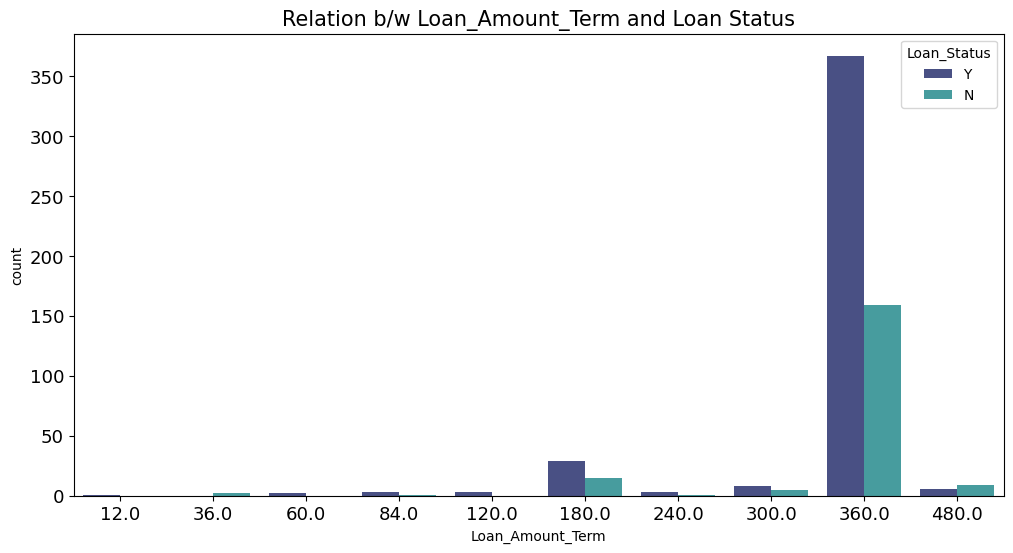

In [23]:
plt.figure(figsize = (12,6),facecolor='White')
sns.countplot(x='Loan_Amount_Term',data = data,hue="Loan_Status",palette="mako")
plt.title('Relation b/w Loan_Amount_Term and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

Observation:
- Loan_Amount_Term "360.0" has the highest rate of loan approvals and rejections,  when compared to 
other Loan_Amount_Terms

It means the "Loan_Amount_Term" of "360.0" is issued and approved the most

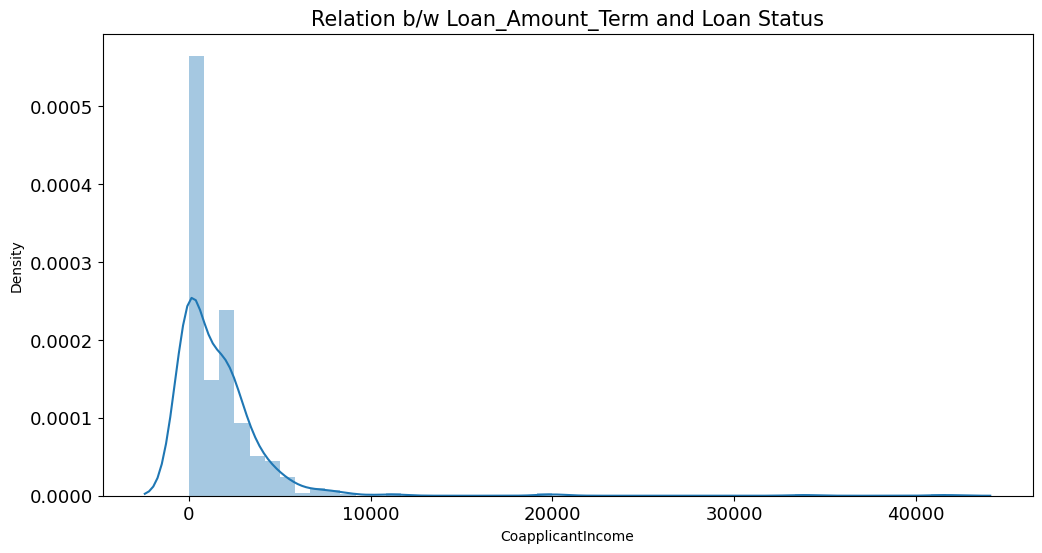

In [24]:
#Relation b/w Loan_Amount_Term and Loan Status
plt.figure(figsize = (12,6),facecolor='White')
sns.distplot(data['CoapplicantIncome'])
plt.title('Relation b/w Loan_Amount_Term and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

Observation:
- Most of the CoapplicantIncome has '0', this should not replaced by mean/median/mode as these complete data can't be completely missing data

### Multivariate Analysis

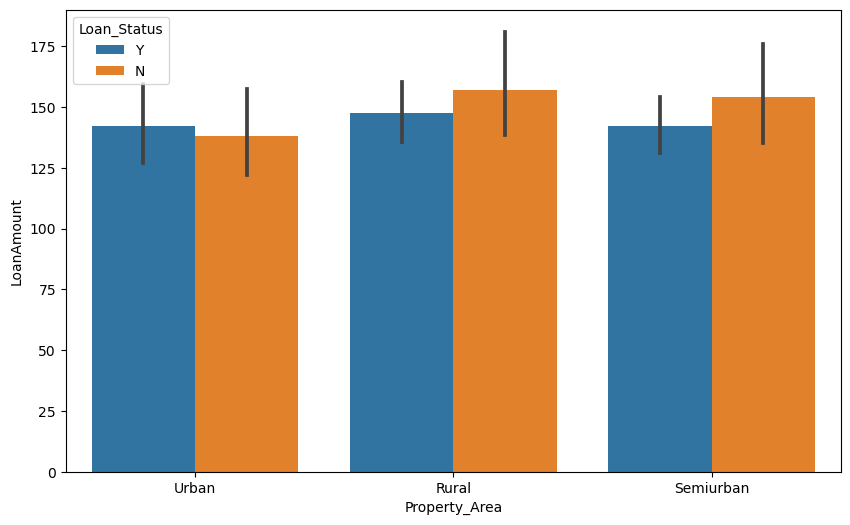

In [25]:
plt.figure(figsize = (10,6))
sns.barplot(x=data['Property_Area'],y=data['LoanAmount'],hue=data['Loan_Status'])
plt.show()

Observation:
- Rural Property Area gets the highest loan amount approved

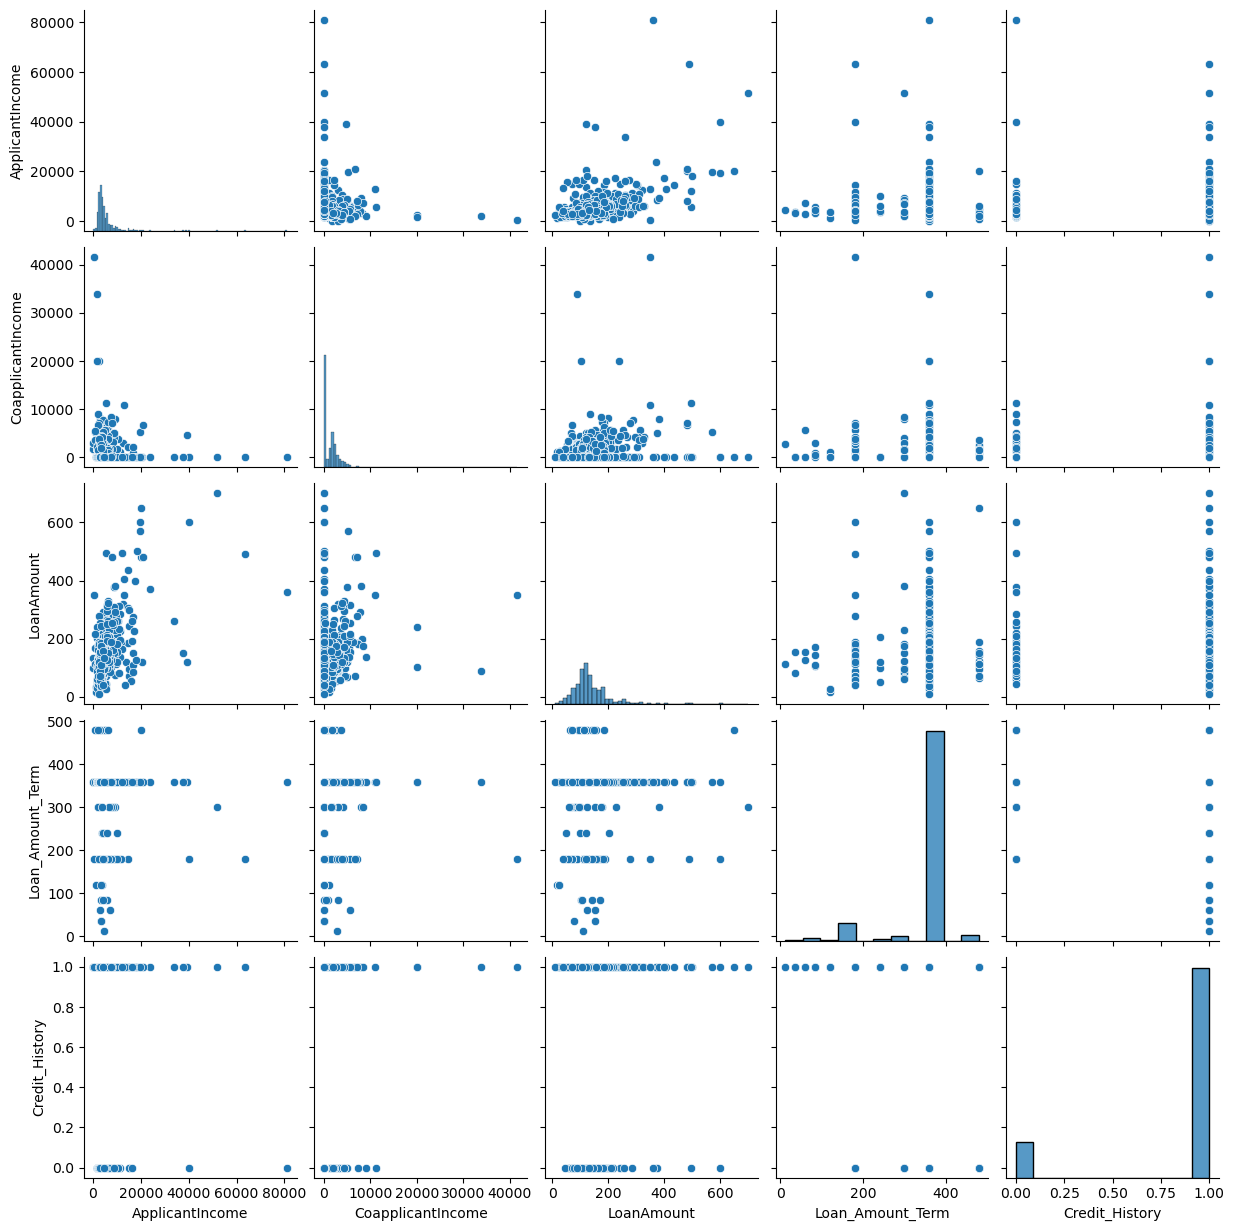

In [26]:
sns.pairplot(data)

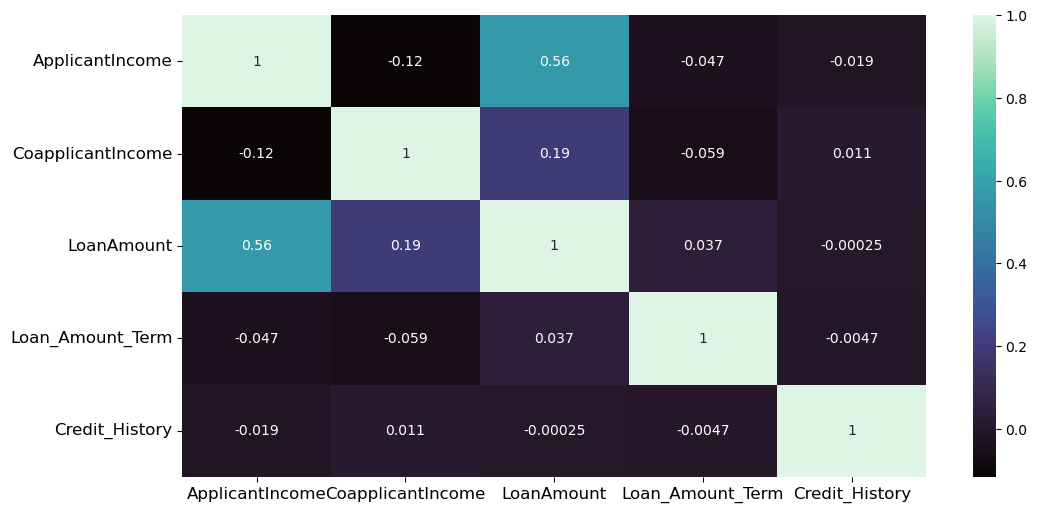

In [27]:
#Let's plot heatmap

plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='mako')
plt.tick_params(labelsize=12)

plt.show()

In [28]:
#correlation data
data.corr()  

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.564698,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189723,-0.059383,0.011134
LoanAmount,0.564698,0.189723,1.000000,0.037152,-0.000250
Loan_Amount_Term,-0.046531,-0.059383,0.037152,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000250,-0.004705,1.000000


Observation:
- CoapplicantIncome has the least correlation with Loan_Amount_Term value: "-0.059154"
- LoanAmount and ApplicantIncome have large correlation of value: "0.564779"

### Data Preprocessing

In [29]:
#Let's drop this column: "Loan_ID" as it contains the loan id's which doesn't affect the loan approval

data = data.drop(columns='Loan_ID')

In [30]:
#Column with Outliers

features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

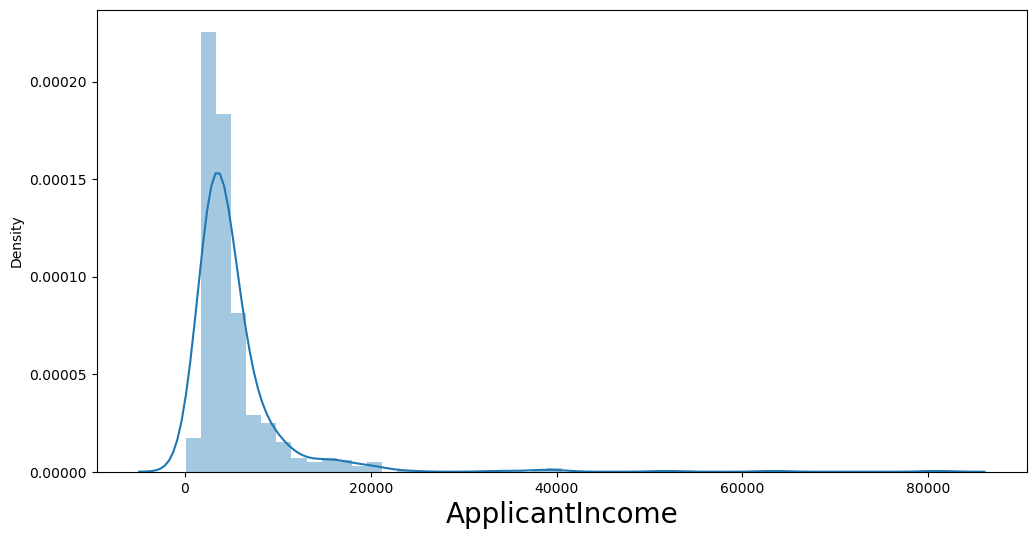

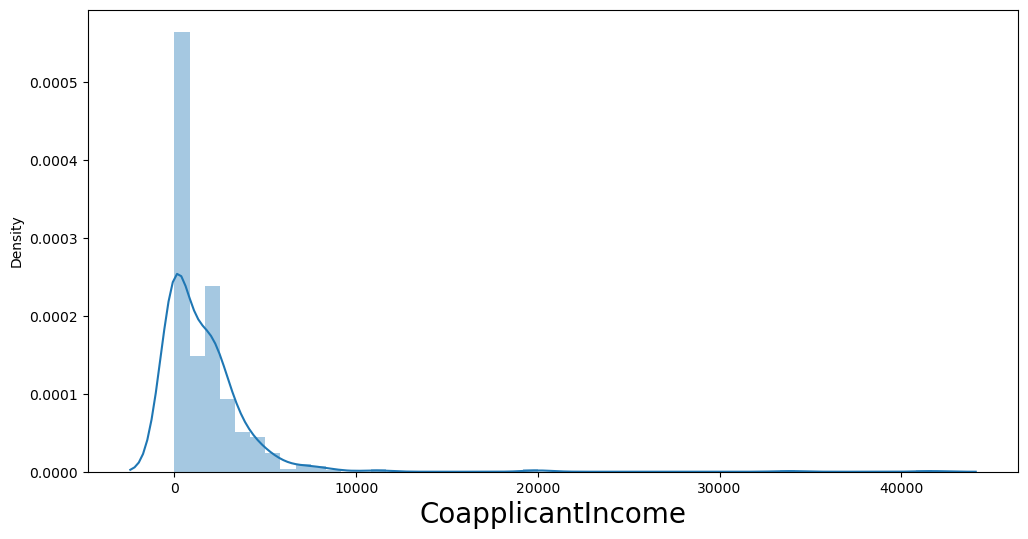

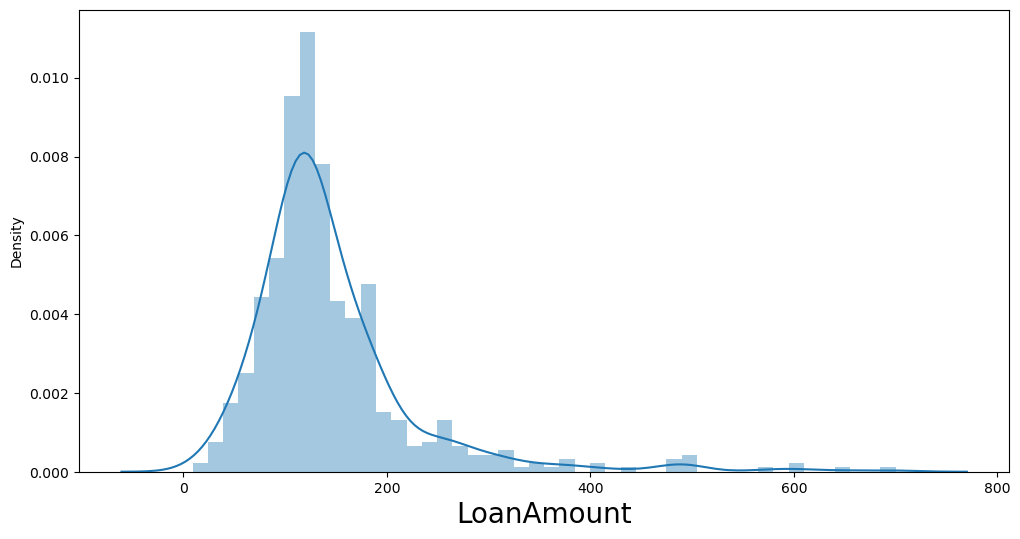

In [31]:
#To check the distribution of the outliers
for i in features:
    plt.figure(figsize=[12,6])
    sns.distplot(data[i])
    plt.xlabel(i,fontsize=20)
plt.show()

We see that our data set are mostly skewed towards right

### Removing the outliers

Applying the IQR Method

In [32]:
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data[features] < (Q1-1.5*IQR)) | (data[features]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [33]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (614, 12)
Shape After          : (564, 12)
Percentage Loss      : 8.143322475570033


Applying the zscore Method

In [34]:
from scipy.stats import zscore  #importing zscore from library
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']  #columns with outliers


z=np.abs(zscore(data[features]))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [35]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (614, 12)
Shape After          : (589, 12)
Percentage Loss      : 4.071661237785016


Percentage Loss is very less by applying zscore method. let's proceed with this

In [36]:
#Copy the data
data_new = data_new2.copy()  

### Skewness

In [37]:
#Skewness Before applying the outlier method

data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [38]:
#Skewness After applying the outlier method
data_new.skew()

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.126225
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

"Loan_Amount_Term" looks like a descrete data so we will ignore the skewness in it
"Credit_History" looks nominal data with value 0 or 1 so we will ignore the skewness in it

In [39]:
#Let's reduce the skewness by using the Powertransformation method

from sklearn.preprocessing import PowerTransformer #importing the library

scaler = PowerTransformer(method='yeo-johnson')
    
data_new['ApplicantIncome'] = scaler.fit_transform(data_new['ApplicantIncome'].values.reshape(-1,1))
data_new['CoapplicantIncome'] = scaler.fit_transform(data_new['CoapplicantIncome'].values.reshape(-1,1))
data_new['LoanAmount'] = scaler.fit_transform(data_new['LoanAmount'].values.reshape(-1,1))

In [40]:
#Skewness After applying the Powertransformation method

data_new.skew()

ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.060859
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

We see that the skewness are removed

### Encoding Data

In [41]:
l1 = ['Gender', 'Married','Education','Loan_Status','Self_Employed']

In [42]:
#Let's use Label Encoder method

from sklearn.preprocessing import LabelEncoder  #importing library

le = LabelEncoder()  #calling function

for i in l1:
     if data_new[i].dtypes=='object':
            data_new[i]= le.fit_transform(data_new[i].values.reshape(-1,1))
data_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.688986,-1.119438,-0.140470,360.0,1.0,Urban,1
1,1,1,1,0,0,0.239843,0.748807,0.011197,360.0,1.0,Rural,0
2,1,1,0,0,1,-0.525799,-1.119438,-1.380101,360.0,1.0,Urban,1
3,1,1,0,1,0,-0.791841,0.899419,-0.140470,360.0,1.0,Urban,1
4,1,0,0,0,0,0.736280,-1.119438,0.245654,360.0,1.0,Urban,1


In [43]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [44]:
data['Dependents'].value_counts()  

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [45]:
#Get dummies
l2 = pd.get_dummies(data_new['Property_Area'])
l3 = pd.get_dummies(data_new['Dependents'])

#Concat with main dataframe by dropping workclass dataframe
data_new=pd.concat([data_new.drop('Property_Area',axis=1),l2],axis=1)
data_new=pd.concat([data_new.drop('Dependents',axis=1),l3],axis=1)

In [46]:
data_new.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban,0,1,2,3+
0,1,0,0,0,0.688986,-1.119438,-0.140470,360.0,1.0,1,0,0,1,1,0,0,0
1,1,1,0,0,0.239843,0.748807,0.011197,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,0,1,-0.525799,-1.119438,-1.380101,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,1,0,-0.791841,0.899419,-0.140470,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,0,0,0.736280,-1.119438,0.245654,360.0,1.0,1,0,0,1,1,0,0,0


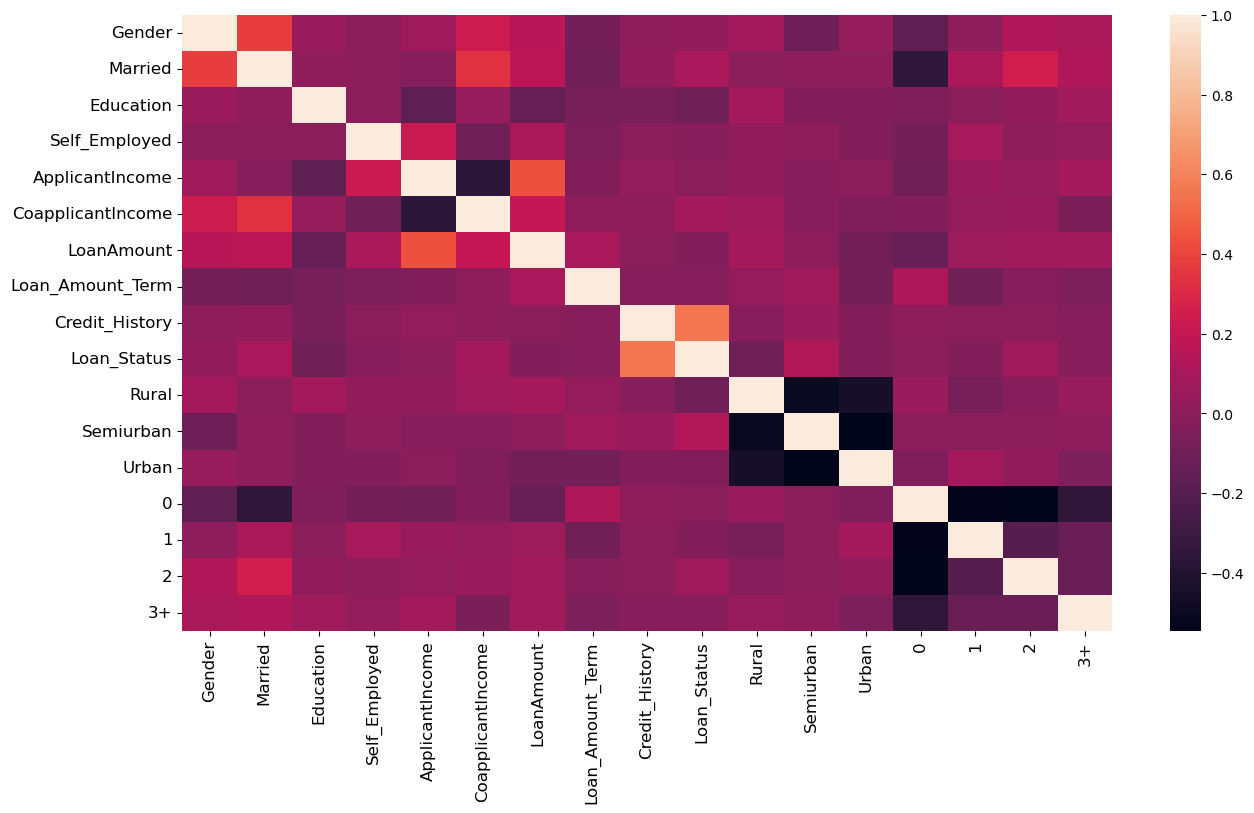

In [47]:
# Let's plot heatmap

plt.figure(figsize=(15,8))
sns.heatmap(data_new.corr(),annot=False)
plt.tick_params(labelsize=12)

plt.show()


## Splitting features and labels

In [48]:
X = data_new.drop(columns = 'Loan_Status') #Features
Y = data_new['Loan_Status'] #Label

In [49]:
# Handiling the class having imbalance using SMOTE (Oversampling method)

from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_over,Y_over = sm.fit_resample(X,Y)

In [50]:
round(Y_over.value_counts(normalize=True)*100,2).astype('str')+'%'

1    50.0%
0    50.0%
Name: Loan_Status, dtype: object

In [51]:
# adding samples to make all the categorical quality values same
# from imblearn.over_sampling import SMOTE

# oversample = SMOTE()
# X, Y = oversample.fit_resample(X, Y)
# Y.value_counts()

#### Scaling the data

In [52]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_over)

Finding the Best Random State

In [53]:
from sklearn.linear_model import LogisticRegression

maxAccuracy = 0
maxAcc = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy = acc
        maxAcc = i
        
print('The best accuracy is ',maxAccuracy, ' with Random State ',maxAcc)

The best accuracy is  0.8588957055214724  with Random State  17


In [54]:
#TrainTestSplit
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = maxAcc)

### Model Building

In [57]:
#Importing Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [58]:
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train) #training the model
y_pred_log = Log_Reg.predict(x_test) #testing and predicting data

#Accuracy Score
print("Accuracy Score:",accuracy_score(y_test,y_pred_log))
A1 = accuracy_score(y_test,y_pred_log)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(Log_Reg,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean())
CV1 = cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean()
#classification_report
print(classification_report(y_test,y_pred_log))

Accuracy Score: 0.8588957055214724
Cross Validation Score:  [0.68711656 0.72392638 0.82822086 0.84662577 0.86419753]
Avg_Cross_Validation Score:  0.7900174202832689
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        78
           1       0.81      0.95      0.88        85

    accuracy                           0.86       163
   macro avg       0.87      0.85      0.86       163
weighted avg       0.87      0.86      0.86       163



Random Forest Classifier

In [59]:
Rand2 = RandomForestClassifier()
Rand2.fit(x_train,y_train) #training the model
y_pred_rand2 = Rand2.predict(x_test) #testing and predicting data

#Accuracy Score
A2 = accuracy_score(y_test,y_pred_rand2)

#Cross Validation Score
CV2 = cross_val_score(Rand2,X_scaled,Y_over,cv=5).mean()

In [60]:
#Accuracy Score
print("Accuracy Score:",A2)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(Rand2,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',CV2)

#classification_report
print(classification_report(y_test,y_pred_rand2))

Accuracy Score: 0.8834355828220859
Cross Validation Score:  [0.7607362  0.78527607 0.8404908  0.88957055 0.87037037]
Avg_Cross_Validation Score:  0.8341816253881694
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        78
           1       0.88      0.91      0.89        85

    accuracy                           0.88       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.88      0.88      0.88       163



Decision Tree Classifier

In [61]:
dt = DecisionTreeClassifier() #calling the model
dt.fit(x_train,y_train) #training the model
y_pred_dt = dt.predict(x_test) #testing and predicting data

#Accuracy Score
A3 = accuracy_score(y_test,y_pred_dt)
print("Accuracy Score:",A3)


#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(dt,X_scaled,Y_over,cv=5))
CV3 = cross_val_score(dt,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV3)

#classification_report
print(classification_report(y_test,y_pred_dt))

Accuracy Score: 0.8159509202453987
Cross Validation Score:  [0.69325153 0.71165644 0.7607362  0.80368098 0.83333333]
Avg_Cross_Validation Score:  0.7654699689464517
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        78
           1       0.84      0.80      0.82        85

    accuracy                           0.82       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.82      0.82      0.82       163



KNeighbors Classifier

In [62]:
knn=KNeighborsClassifier() #calling the model
knn.fit(x_train,y_train) #training the model
y_pred_knn = knn.predict(x_test) #testing and predicting data

#Accuracy Score
A4 = accuracy_score(y_test,y_pred_knn)
print("Acicuracy Score:",A4)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(knn,X_scaled,Y_over,cv=5))
CV4 = cross_val_score(knn,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV4)

#classification_report
print(classification_report(y_test,y_pred_knn))

Acicuracy Score: 0.7975460122699386
Cross Validation Score:  [0.70552147 0.68711656 0.7607362  0.80981595 0.75925926]
Avg_Cross_Validation Score:  0.7444898886616679
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        78
           1       0.80      0.82      0.81        85

    accuracy                           0.80       163
   macro avg       0.80      0.80      0.80       163
weighted avg       0.80      0.80      0.80       163



AdaBoost Classifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier

adb= AdaBoostClassifier(n_estimators=10) #calling the model
adb.fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)

#Accuracy Score
A5 = accuracy_score(y_test,y_pred_adb)
print("Accuracy Score:",A5)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(adb,X_scaled,Y_over,cv=5))
CV5 = cross_val_score(adb,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV5)

#classification_report
print(classification_report(y_test,y_pred_adb))

Accuracy Score: 0.8098159509202454
Cross Validation Score:  [0.66257669 0.6993865  0.80368098 0.80981595 0.82098765]
Avg_Cross_Validation Score:  0.7592895554040748
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        78
           1       0.78      0.89      0.83        85

    accuracy                           0.81       163
   macro avg       0.82      0.81      0.81       163
weighted avg       0.82      0.81      0.81       163



SVC

In [64]:
from sklearn.svm import SVC

sv=SVC() #calling the model
sv.fit(x_train,y_train) #training the model
y_pred_sv = sv.predict(x_test) #testing and predicting data

#Accuracy Score
A6 = accuracy_score(y_test,y_pred_sv)
print("Accuracy Score:",A6)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(sv,X_scaled,Y_over,cv=5))
CV6 = cross_val_score(sv,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV6)

#classification_report
print(classification_report(y_test,y_pred_sv))

Accuracy Score: 0.8282208588957055
Cross Validation Score:  [0.72392638 0.72392638 0.82822086 0.88343558 0.82098765]
Avg_Cross_Validation Score:  0.7960993713549951
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        78
           1       0.80      0.89      0.84        85

    accuracy                           0.83       163
   macro avg       0.83      0.83      0.83       163
weighted avg       0.83      0.83      0.83       163



Let's check for our Overall scores of our models:

In [65]:
Overall_Score = pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','Decision Tree',
                                       'KNeighbors Classifier','AdaBoost Classifier','SVC'],
                              'Accuracy_Score':[A1,A2,A3,A4,A5,A6],
                              'Cross_Validation_Score':[CV1,CV2,CV3,CV4,CV5,CV6]})


Overall_Score['Difference'] = Overall_Score['Accuracy_Score'] - Overall_Score['Cross_Validation_Score']
Overall_Score

,Model,Accuracy_Score,Cross_Validation_Score,Difference
0,Logistic Regression,0.858896,0.790017,0.068878
1,Random Forest Classifier,0.883436,0.834182,0.049254
2,Decision Tree,0.815951,0.765470,0.050481
3,KNeighbors Classifier,0.797546,0.744490,0.053056
4,AdaBoost Classifier,0.809816,0.759290,0.050526
5,SVC,0.828221,0.796099,0.032121


In [66]:
Overall_Score['Difference'].min()

0.032121487540710425

In [67]:
Overall_Score[Overall_Score['Difference']==0.032121487540710425]

,Model,Accuracy_Score,Cross_Validation_Score,Difference
5,SVC,0.828221,0.796099,0.032121


### Hyper Parameter Tuning

In [71]:
#Importing library
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Instantiate SVM classifier
svm = SVC()

# Grid search with cross-validation
gridsearch = GridSearchCV(estimator=sv, param_grid=param_grid, cv=5, n_jobs=-1)
gridsearch.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [72]:
# Best parameters and best score
print("Best Parameters: ", gridsearch.best_params_)
print("Best Score: ", gridsearch.best_score_)

Best Parameters:  {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best Score:  0.7880563711098063


In [78]:
svm=SVC(C= 10, gamma= 1, kernel='linear') #calling the model
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

Saving the model for future prediction:

In [79]:
import joblib
joblib.dump(svm,'Loan_Application_Status_Predictions.obj')

['Loan_Application_Status_Predictions.obj']

Performance Metrics

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


#Accuracy Score
print("\n","Accuracy Score:",accuracy_score(y_test,y_pred))

#Precision
precision = precision_score(y_test,y_pred)
print("\n",'Precision:   ', precision)

#recall_score
recall = recall_score(y_test,y_pred)
print("\n",'Recall:      ', recall)

#F1 score
f1 = f1_score(y_test,y_pred)
print("\n",'F1 score:    ', f1)    

#ROC_AUC_SCORE
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
print("\n","ROC_AUC_SCORE : ",roc_auc)


 Accuracy Score: 0.8588957055214724

 Precision:    0.7924528301886793

 Recall:       0.9882352941176471

 F1 score:     0.8795811518324608

 ROC_AUC_SCORE :  0.8530920060331826


In [87]:
print('\nClassification Report:\n\n',classification_report(y_test,y_pred))


Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.72      0.83        78
           1       0.79      0.99      0.88        85

    accuracy                           0.86       163
   macro avg       0.89      0.85      0.85       163
weighted avg       0.88      0.86      0.86       163



# "accuracy score: 85.89 %"